### **Random Forest**

In [12]:
import pandas as pd

#from google.colab import drive
#drive.mount('/content/drive')

#df= pd.read_csv("/content/drive/MyDrive/preprocessed_file_v1_filtered", sep="\t")
df= pd.read_csv("preprocessed_file_v4_filtered", sep="\t")

C:\Users\Sami\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1350,1351,1352,1353) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
features= df.drop(['SAMPLE_ID'], axis = 1)
features.head()

,NRAS,ATM,KRAS,AKT1,TP53,ERBB2,CTNNB1,PIK3CA,KIT,APC,...,KIF5B,PTTG1,CANCER_TYPE,SEX,PRIMARY_RACE,ETHNICITY,YEAR_CONTACT,DEAD,YEAR_DEATH,AGE_AT_SEQ_REPORT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,Glioma,Male,White,Non-Spanish/non-Hispanic,Unknown,Unknown,Unknown,<18
1,0,0,0,0,0,0,0,0,0,0,...,0,0,Glioma,Male,White,Non-Spanish/non-Hispanic,Unknown,Unknown,Unknown,<18
2,0,0,0,0,0,0,0,0,0,0,...,0,0,Glioma,Male,White,Non-Spanish/non-Hispanic,Unknown,Unknown,Unknown,<18
3,0,0,0,0,0,0,0,0,0,0,...,0,0,Glioma,Female,White,Non-Spanish/non-Hispanic,Unknown,Unknown,Unknown,<18
4,0,0,0,0,1,0,0,0,0,0,...,0,0,Glioma,Male,Unknown,Non-Spanish/non-Hispanic,Unknown,Unknown,Unknown,<18


In [14]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
df.CANCER_TYPE = pd.Categorical(df.CANCER_TYPE)
df.CANCER_TYPE = df.CANCER_TYPE.cat.codes
labels = np.array(df['CANCER_TYPE'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('CANCER_TYPE', axis = 1)

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)


# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [15]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (37974, 1653)
Training Labels Shape: (37974,)
Testing Features Shape: (12659, 1653)
Testing Labels Shape: (12659,)


### **Train Model**

In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, verbose=2)
# Train the model on training data
rf.fit(train_features, train_labels);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building

building tree 322 of 1000
building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tre

building tree 638 of 1000
building tree 639 of 1000
building tree 640 of 1000
building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tre

building tree 954 of 1000
building tree 955 of 1000
building tree 956 of 1000
building tree 957 of 1000
building tree 958 of 1000
building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 12.8min finished


### **Make Predictions**

In [17]:
predictions = rf.predict(test_features)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy: 0.8334781578323722


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.6s finished


In [18]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: APC                  Importance: 0.09
Variable: KRAS                 Importance: 0.04
Variable: EGFR                 Importance: 0.03
Variable: SEX_Female           Importance: 0.03
Variable: SEX_Male             Importance: 0.03
Variable: TP53                 Importance: 0.02
Variable: PIK3CA               Importance: 0.02
Variable: IDH1                 Importance: 0.02
Variable: TERT                 Importance: 0.02
Variable: BRAF                 Importance: 0.01
Variable: CDH1                 Importance: 0.01
Variable: SMAD4                Importance: 0.01
Variable: PTEN                 Importance: 0.01
Variable: FBXW7                Importance: 0.01
Variable: STK11                Importance: 0.01
Variable: ATRX                 Importance: 0.01
Variable: KEAP1                Importance: 0.01
Variable: GATA3                Importance: 0.01
Variable: PRIMARY_RACE_Not collected Importance: 0.01
Variable: PRIMARY_RACE_White   Importance: 0.01
Variable: ETHNICITY_Non-Spanish/no

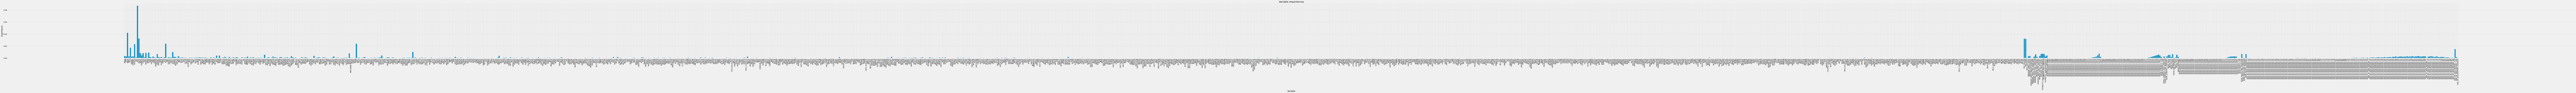

In [19]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(350,8))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

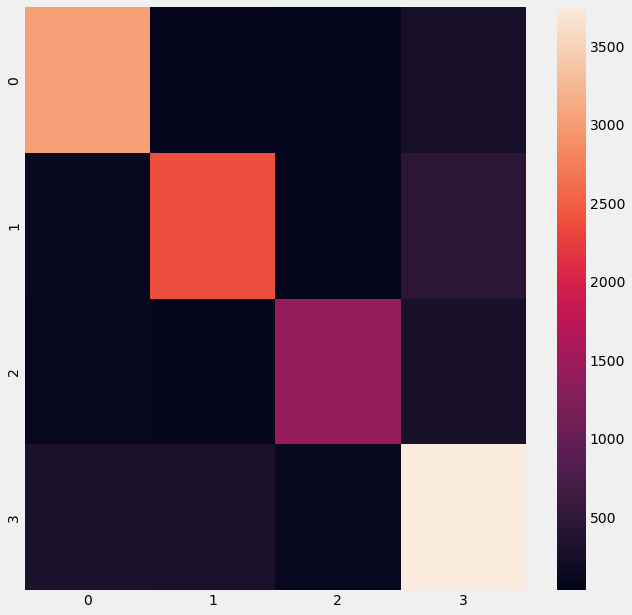

In [20]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, predictions)


# Visualize it as a heatmap
import seaborn
plt.figure(figsize=(10,10))
seaborn.heatmap(conf_mat)
plt.show()

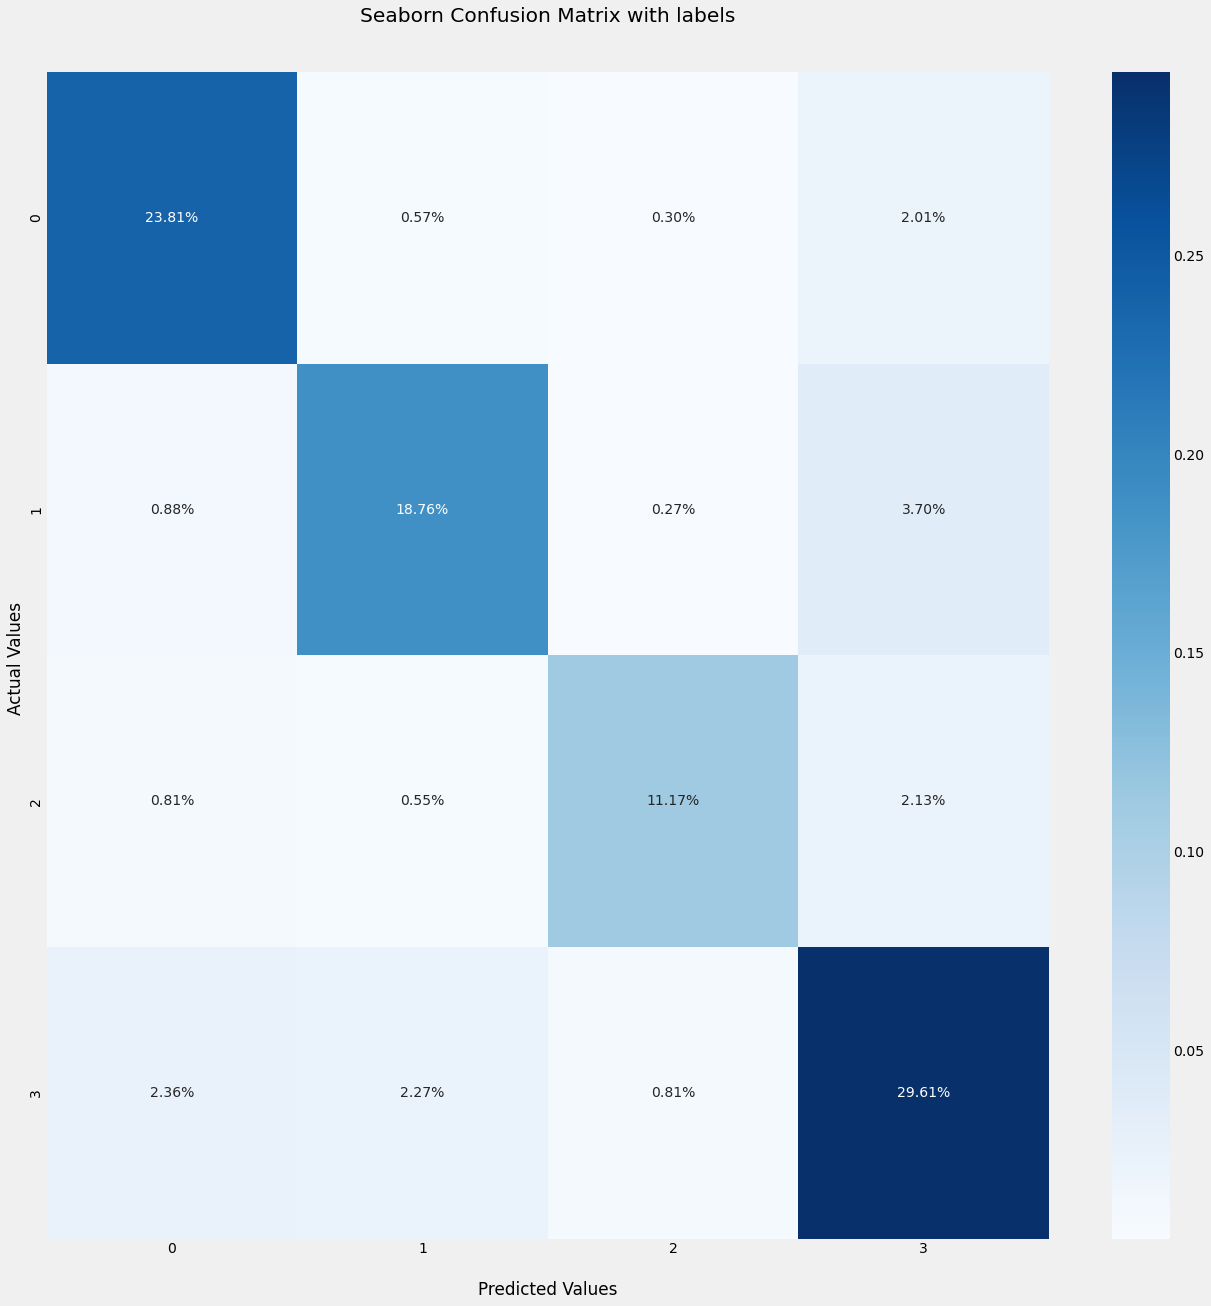

In [21]:
import seaborn as sns
plt.figure(figsize=(20,20))

ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Display the visualization of the Confusion Matrix.
plt.show()